In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch

In [2]:
env = UnityEnvironment(file_name="D:/learning/rl udacity/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [4]:
from dqn_agent import Agent

In [5]:
n_episodes = 2500
eps_start = 1.
eps_end=0.01
eps_decay=0.995
max_t = 1000
s_model = 'dqn'

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

scores = []                        # list containing scores from each episode
scores_std = []                    # List containing the std dev of the last 100 episodes
scores_avg = []                    # List containing the mean of the last 100 episodes
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    for t in range(max_t):
        action = agent.act(state, eps)
        action = action.astype(int)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    scores_std.append(np.std(scores_window)) # save most recent std dev
    scores_avg.append(np.mean(scores_window)) # save most recent std dev
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=15:
        s_msg = '\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
        print(s_msg.format(i_episode, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), '%scheckpoint_%s.pth')
        break
 

Episode 100	Average Score: 0.77
Episode 200	Average Score: 3.36
Episode 300	Average Score: 6.82
Episode 400	Average Score: 10.30
Episode 500	Average Score: 12.58
Episode 600	Average Score: 13.88
Episode 697	Average Score: 15.04
Environment solved in 697 episodes!	Average Score: 15.04


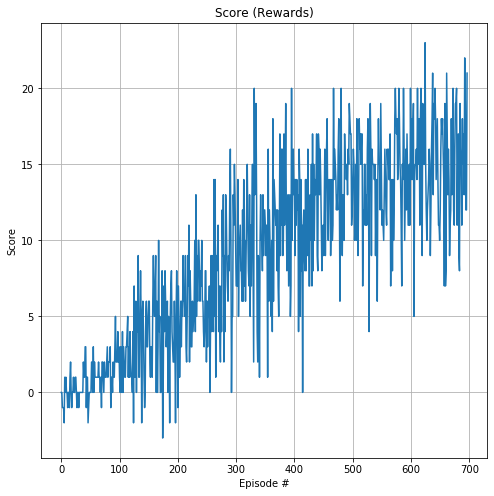

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.title('Score (Rewards)')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.grid(True)      
plt.show()

In [7]:
env.close()